In [72]:
vowel_means=[-1,1]
personality=['F','S']#F=FLEXIBLE,S=STURBBON
def create_agent(vowel_means,personality):
    return [vowel_means,personality]
agent_one=create_agent(vowel_means[0],personality[1])
print(agent_one)

[-1, 'S']


In [73]:
import random
def create_population(n):
    population=[]
    for i in range(n):
        v=random.choice(vowel_means)
        p=random.choice(personality)
        agent=create_agent(v,p)
        population.append(agent)
    return population
random_twenty=create_population(20)
print(random_twenty)

[[-1, 'S'], [1, 'S'], [-1, 'S'], [1, 'S'], [1, 'S'], [-1, 'S'], [1, 'F'], [-1, 'F'], [1, 'S'], [1, 'F'], [-1, 'F'], [-1, 'S'], [-1, 'S'], [-1, 'F'], [1, 'S'], [-1, 'S'], [1, 'F'], [-1, 'S'], [-1, 'F'], [-1, 'S']]


In [74]:
import numpy as np
def choose_utterance(agent):
    """
    agent produces an utterance around its mean
    """
    return np.random.normal(agent[0],0.25)
first_utterance=choose_utterance(random_twenty[0])
print(first_utterance)

-1.5430370210947273


In [75]:
from copy import deepcopy
def learn(utterance,agent):
    """
update agents mean depending on personality
"""
    if agent[1]=='F':
        new_mean=(utterance+agent[0])/2
    else:
        difference=abs(utterance-agent[0])
        if utterance>agent[0]:
            new_mean=agent[0]+(difference/10)
        else:
            new_mean=agent[0]-(difference/10)
    agent[0]=deepcopy(new_mean)
    return agent
stb_agent=[-1,'S']
flx_agent=[-1,'F']
learn(1,stb_agent)
learn(1,flx_agent)
print(stb_agent)
print(flx_agent)
    
        
    

[-0.8, 'S']
[0.0, 'F']


In [76]:
def interact(agent1,agent2):
    """
    two agents interact and if necessary update each other
    """
    agent1_utterance=choose_utterance(agent1)
    agent2_utterance=choose_utterance(agent2)
    if agent1[0]==agent2[0]:
        pass
    else:
        learn(agent2_utterance,agent1)
        learn(agent1_utterance,agent2)
    return agent1,agent2
a1,a2=interact([-1,'F'],[1,'S'])


In [77]:
def choose_pair(population):
    """
    pick two distinct agents
    """
    i=random.choice(population)
    j=random.choice(population)
    while i==j:
        j=random.choice(population)
    return i,j
pair1,pair2=choose_pair(random_twenty)
print(pair1)
print(pair2)
        

[-1, 'F']
[1, 'F']


In [78]:
def simulate(n,k):
    initial_population=create_population(n)
    final_population=deepcopy(initial_population)
    for i in range(k):
        agent1,agent2=choose_pair(final_population)
        interact(agent1,agent2)
    return initial_population,final_population
initial_population,final_population=simulate(200,2000)
print(f'initial population is, {initial_population}')
print(f'final population is, {final_population}')

        

initial population is, [[1, 'S'], [-1, 'F'], [-1, 'F'], [-1, 'F'], [-1, 'S'], [-1, 'F'], [-1, 'F'], [1, 'F'], [-1, 'F'], [-1, 'S'], [-1, 'F'], [1, 'S'], [-1, 'F'], [-1, 'S'], [1, 'F'], [-1, 'F'], [1, 'F'], [-1, 'S'], [-1, 'S'], [1, 'F'], [-1, 'F'], [-1, 'S'], [1, 'F'], [-1, 'S'], [1, 'F'], [1, 'S'], [1, 'S'], [1, 'S'], [-1, 'F'], [1, 'F'], [-1, 'S'], [1, 'S'], [1, 'S'], [-1, 'F'], [1, 'F'], [1, 'S'], [-1, 'S'], [-1, 'S'], [-1, 'S'], [1, 'F'], [-1, 'S'], [1, 'S'], [-1, 'F'], [-1, 'F'], [-1, 'S'], [-1, 'S'], [-1, 'F'], [1, 'S'], [1, 'S'], [1, 'F'], [-1, 'S'], [-1, 'S'], [1, 'S'], [-1, 'S'], [-1, 'S'], [1, 'F'], [1, 'F'], [-1, 'F'], [-1, 'S'], [1, 'F'], [1, 'S'], [-1, 'S'], [-1, 'S'], [-1, 'F'], [-1, 'F'], [-1, 'S'], [-1, 'F'], [-1, 'S'], [-1, 'F'], [-1, 'F'], [1, 'F'], [-1, 'F'], [1, 'F'], [1, 'S'], [1, 'F'], [1, 'S'], [-1, 'F'], [-1, 'S'], [1, 'S'], [-1, 'F'], [-1, 'S'], [1, 'S'], [1, 'S'], [1, 'S'], [1, 'F'], [-1, 'S'], [1, 'F'], [1, 'F'], [-1, 'F'], [-1, 'F'], [1, 'F'], [-1, 'F'], [-1

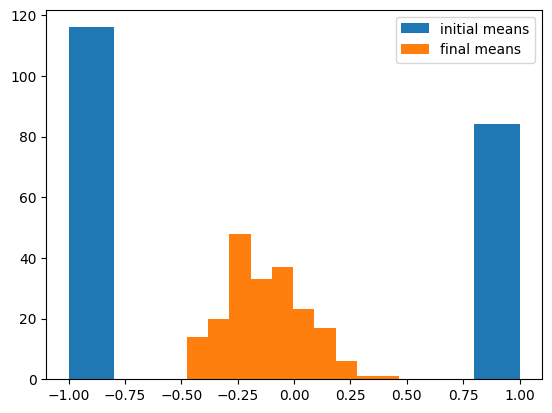

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
initial_means=[]
final_means=[]
for agent in range(len(initial_population)):
    initial_means.append(initial_population[agent][0])
    final_means.append(final_population[agent][0])
plt.hist(initial_means,label='initial means')
plt.hist(final_means,label='final means')
plt.legend(loc='best')
plt.show()


In [80]:
def calc_mean(population):
    t=0
    for agent in population:
        t+=agent[0]
    return t/len(population)
calc_mean(final_population)

-0.12925757147439454

In [81]:
def batch_simulate(n,k,s):
    batch_means=[]
    for i in range(s):
        initial_poulation,final_population=simulate(n,k)
        mean=calc_mean(final_population)
        batch_means.append(mean)
    return batch_means
first_batch=batch_simulate(200,2000,500)
        

Text(0, 0.5, 'number of simulations')

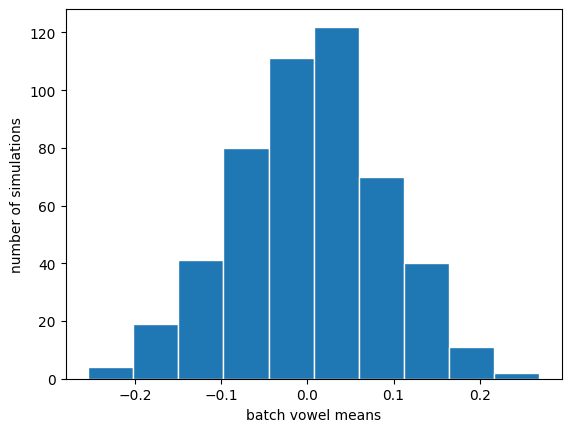

In [82]:
%matplotlib inline
plt.hist(first_batch,edgecolor='white')
plt.xlabel('batch vowel means')
plt.ylabel('number of simulations')

In [83]:
def create_biased_population(n,st):
    """
    create a population with 'st sturbbon agents and (n-st) flexible agents
    """
    population=[]
    for i in range(st):
        v=random.choice(vowel_means)
        agent=create_agent(v,personality[1])
        population.append(agent)
    for i in range(n-st):
        v=random.choice(vowel_means)
        agent=create_agent(v,personality[0])
        population.append(agent)
    return population
biased_twenty=create_biased_population(20,5)
print(biased_twenty)
        

[[1, 'S'], [1, 'S'], [-1, 'S'], [-1, 'S'], [-1, 'S'], [-1, 'F'], [-1, 'F'], [-1, 'F'], [-1, 'F'], [-1, 'F'], [-1, 'F'], [-1, 'F'], [1, 'F'], [-1, 'F'], [-1, 'F'], [1, 'F'], [1, 'F'], [-1, 'F'], [-1, 'F'], [-1, 'F']]


In [84]:
def simulate_biased_population(n,k,st):
    initial_population=create_biased_population(n,st)
    final_population=deepcopy(initial_population)
    for i in range(k):
        agent1,agent2=choose_pair(final_population)
        interact(agent1,agent2)
    return initial_population,final_population
initial_population,final_population=simulate_biased_population(200,2000,50)
print(f'The initial population is {initial_population}.Whereas the final population is {final_population}.')




The initial population is [[-1, 'S'], [1, 'S'], [1, 'S'], [-1, 'S'], [-1, 'S'], [1, 'S'], [-1, 'S'], [-1, 'S'], [-1, 'S'], [-1, 'S'], [1, 'S'], [-1, 'S'], [1, 'S'], [-1, 'S'], [-1, 'S'], [-1, 'S'], [-1, 'S'], [1, 'S'], [1, 'S'], [1, 'S'], [1, 'S'], [1, 'S'], [1, 'S'], [1, 'S'], [1, 'S'], [-1, 'S'], [1, 'S'], [-1, 'S'], [-1, 'S'], [-1, 'S'], [-1, 'S'], [1, 'S'], [1, 'S'], [-1, 'S'], [1, 'S'], [1, 'S'], [-1, 'S'], [-1, 'S'], [-1, 'S'], [-1, 'S'], [-1, 'S'], [-1, 'S'], [1, 'S'], [1, 'S'], [-1, 'S'], [-1, 'S'], [1, 'S'], [1, 'S'], [-1, 'S'], [-1, 'S'], [-1, 'F'], [-1, 'F'], [-1, 'F'], [1, 'F'], [1, 'F'], [1, 'F'], [-1, 'F'], [-1, 'F'], [1, 'F'], [1, 'F'], [-1, 'F'], [-1, 'F'], [1, 'F'], [-1, 'F'], [1, 'F'], [1, 'F'], [-1, 'F'], [1, 'F'], [-1, 'F'], [-1, 'F'], [1, 'F'], [1, 'F'], [1, 'F'], [1, 'F'], [1, 'F'], [-1, 'F'], [-1, 'F'], [1, 'F'], [1, 'F'], [1, 'F'], [1, 'F'], [-1, 'F'], [-1, 'F'], [-1, 'F'], [-1, 'F'], [1, 'F'], [-1, 'F'], [1, 'F'], [-1, 'F'], [-1, 'F'], [-1, 'F'], [1, 'F'], [1, 

In [85]:
def population_means(initial_population, final_population):
    initial_means = [agent[0] for agent in initial_population]
    final_means = [agent[0] for agent in final_population]
    return initial_means, final_means


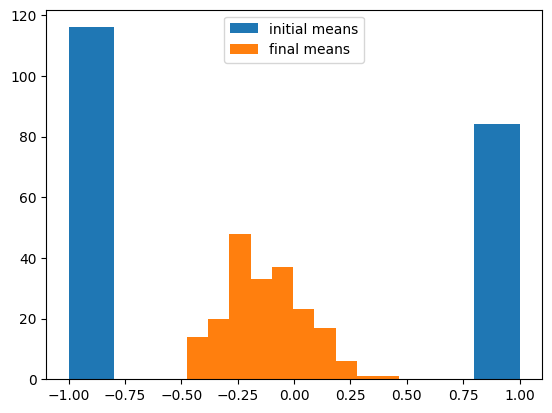

In [86]:
plt.hist(initial_means,label='initial means')
plt.hist(final_means,label='final means')
plt.legend(loc='upper center')
plt.show()

In [87]:
def compute_sd(population):
    means = [agent[0] for agent in population]
    return np.std(means)

In [88]:
def batch_simulated_biased_population(n,k,s):
    sturbon_agents=[0,int(n/10.),int(n/5.),int(n/2.),int(3*n/4.),n]
    overall_results=[]
    for st in sturbon_agents:
        batch_results=[]
        for i in range(s):
            initial_population,final_population=simulate_biased_population(n,k,st)
            initial_means,final_means=population_means(initial_population,final_population)
            final_population_std=float(compute_sd(final_population))
            batch_results.append(final_population_std)
        overall_results.append([st,batch_results])
    return overall_results
my_first_batch=batch_simulated_biased_population(200,2000,50)
print(my_first_batch)
            
            
        
        
    
    
    
    

[[0, [0.1565886373723745, 0.16767164284855107, 0.17317219648892535, 0.18178027803519967, 0.16059822113775257, 0.17385824060251334, 0.15087245567253663, 0.15717000641895076, 0.17130163576394514, 0.17377290943324622, 0.17667100163512905, 0.16973911178616707, 0.16658097745008982, 0.17016372900368773, 0.1765340766887958, 0.1598875090155899, 0.1702764823283879, 0.17559514374542465, 0.18513577246507296, 0.18936321137522028, 0.16273343246928815, 0.17688484878528313, 0.16050973866495044, 0.15752686053196577, 0.19439096148358764, 0.1947025011731036, 0.18203327140653744, 0.16887243669368543, 0.18813291525502734, 0.1666816847067419, 0.17938350942227646, 0.18455274639115085, 0.17480415999232216, 0.18154744660578193, 0.19145109272934757, 0.19373187081498144, 0.1876568378644165, 0.16409231787309492, 0.16992310485299078, 0.17822144620105987, 0.18230033240103352, 0.17420183401763026, 0.15977330385678698, 0.18166907868928417, 0.17483337685489717, 0.18934037983350724, 0.17716979249407333, 0.197028036371

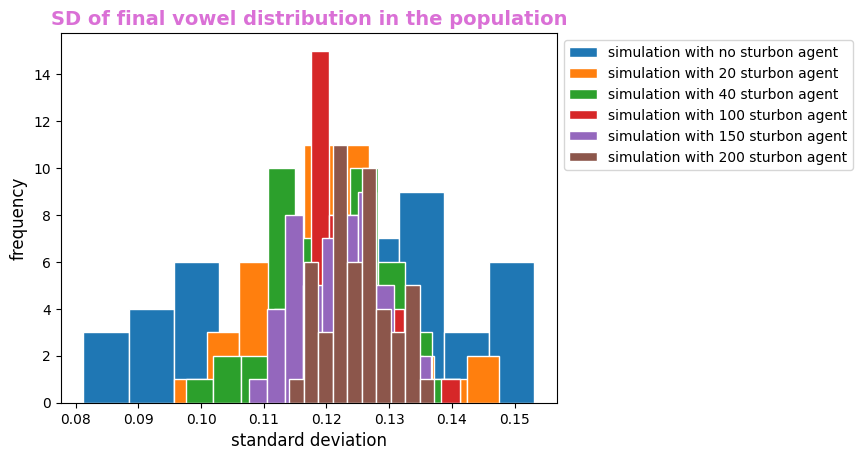

<Figure size 1000x600 with 0 Axes>

In [95]:
plt.hist(my_first_batch[0][1],label='simulation with no sturbon agent',edgecolor='white')
plt.hist(my_first_batch[1][1],label='simulation with 20 sturbon agent',edgecolor='white')
plt.hist(my_first_batch[2][1],label='simulation with 40 sturbon agent',edgecolor='white')
plt.hist(my_first_batch[3][1],label='simulation with 100 sturbon agent',edgecolor='white')
plt.hist(my_first_batch[4][1],label='simulation with 150 sturbon agent',edgecolor='white')
plt.hist(my_first_batch[5][1],label='simulation with 200 sturbon agent',edgecolor='white')
plt.title('SD of final vowel distribution in the population',fontsize=14,weight='bold',color='orchid')
plt.xlabel('standard deviation',fontsize=12)
plt.ylabel('frequency',fontsize=12)
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.show();

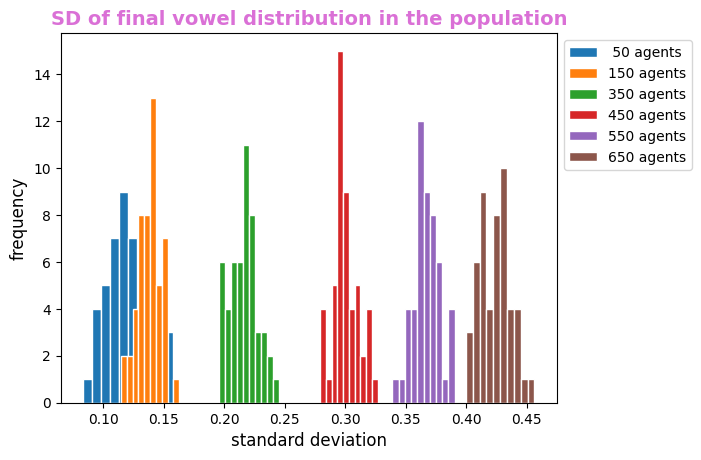

<Figure size 1000x600 with 0 Axes>

In [96]:
def simulate_different_pop_size(k,s):
    pop_size=[50,150,250,350,450,550,650]
    all_results=[]
    for  n in pop_size:
        current_result=[]
        for i in range(s):
            initial_population,final_population=simulate(n,k)
            mean=calc_mean(final_population)
            final_pop_sd= compute_sd(final_population)
            current_result.append(final_pop_sd)
        all_results.append([n,current_result])
    return all_results
my_first_batch=simulate_different_pop_size(2000,50)
plt.hist(my_first_batch[0][1],label=' 50 agents',edgecolor='white')
plt.hist(my_first_batch[1][1],label='150 agents',edgecolor='white')
plt.hist(my_first_batch[2][1],label='350 agents',edgecolor='white')
plt.hist(my_first_batch[3][1],label='450 agents',edgecolor='white')
plt.hist(my_first_batch[4][1],label='550 agents',edgecolor='white')
plt.hist(my_first_batch[5][1],label='650 agents',edgecolor='white')
plt.title('SD of final vowel distribution in the population',fontsize=14,weight='bold',color='orchid')
plt.xlabel('standard deviation',fontsize=12)
plt.ylabel('frequency',fontsize=12)
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.show();

        
        



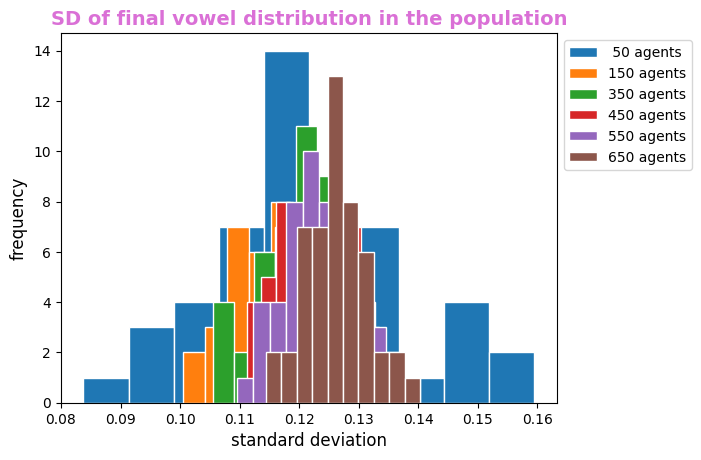

<Figure size 1000x600 with 0 Axes>

In [98]:
my_first_batch=simulate_different_pop_size(10000,50)
plt.hist(my_first_batch[0][1],label=' 50 agents',edgecolor='white')
plt.hist(my_first_batch[1][1],label='150 agents',edgecolor='white')
plt.hist(my_first_batch[2][1],label='350 agents',edgecolor='white')
plt.hist(my_first_batch[3][1],label='450 agents',edgecolor='white')
plt.hist(my_first_batch[4][1],label='550 agents',edgecolor='white')
plt.hist(my_first_batch[5][1],label='650 agents',edgecolor='white')
plt.title('SD of final vowel distribution in the population',fontsize=14,weight='bold',color='orchid')
plt.xlabel('standard deviation',fontsize=12)
plt.ylabel('frequency',fontsize=12)
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.show();